# Check out Qian+2018 tweets

In [4]:
# Load Qian+2018 tweets
import json
import pandas as pd

fpath = '/storage2/mamille3/white_supremacist_lang/data/qian2018/data.jsonl'
with open(fpath, 'r') as f:
    data = pd.json_normalize([json.loads(tweet) for tweet in f.read().splitlines()])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88069 entries, 0 to 88068
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   lang                          88069 non-null  object
 1   created_at                    88069 non-null  object
 2   text                          88069 non-null  object
 3   conversation_id               88069 non-null  object
 4   id                            88069 non-null  object
 5   author_id                     88069 non-null  object
 6   public_metrics.retweet_count  88069 non-null  int64 
 7   public_metrics.reply_count    88069 non-null  int64 
 8   public_metrics.like_count     88069 non-null  int64 
 9   public_metrics.quote_count    88069 non-null  int64 
 10  entities.annotations          41651 non-null  object
 11  entities.mentions             73230 non-null  object
 12  entities.urls                 32646 non-null  object
 13  referenced_tweet

In [5]:
# See timestamp distribution
data['timestamp'] = pd.to_datetime(data['created_at'], utc=True)

In [ ]:
import plotly.express as px

px.histogram(data, x='timestamp')

54331


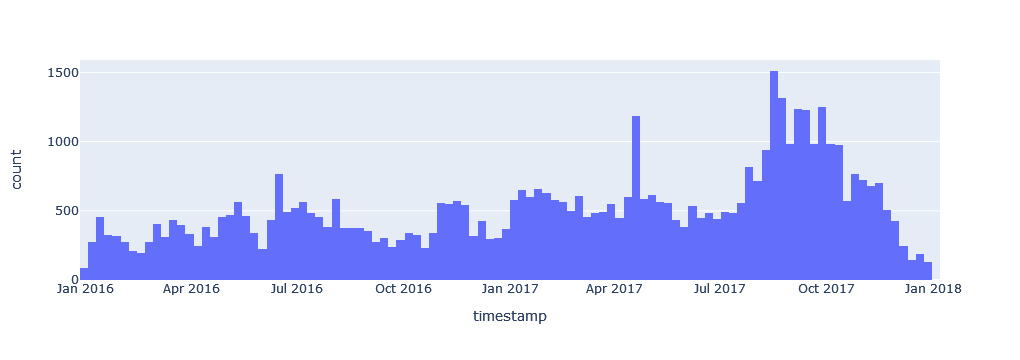

In [26]:
from datetime import datetime, timezone

begin_date = datetime(2016,1,1, tzinfo=timezone.utc)
end_date = datetime(2018,1,1, tzinfo=timezone.utc)
filtered_tweets = data[(data.timestamp >= begin_date) & (data.timestamp < end_date)]
print(len(filtered_tweets))
px.histogram(filtered_tweets, x='timestamp')

# Graph dates of full ADL dataset

In [7]:
# Grph dates of full ADL dataset
# Load ADL dataset
fpath = '../data/adl_heatmap_2022-10-07.csv'
adl_data = pd.read_csv(fpath)
adl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29319 entries, 0 to 29318
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           29319 non-null  int64 
 1   date         29319 non-null  object
 2   city         29319 non-null  object
 3   state        29319 non-null  object
 4   type         29319 non-null  object
 5   ideology     17820 non-null  object
 6   subideology  475 non-null    object
 7   group        17212 non-null  object
 8   description  29319 non-null  object
 9   image        8048 non-null   object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [8]:
adl_data.date.sample(20)

394         04/2022
16145       03/2020
9676        02/2021
20442     5/15/2019
1092        03/2022
6683        09/2021
13363     7/28/2020
26414      5/1/2017
19744      8/1/2019
16584       02/2020
22108    12/25/2018
5184        10/2021
13227       08/2020
240         04/2022
7552        08/2021
26954       03/2017
9500        03/2021
6442        09/2021
19426     8/25/2019
26793       03/2017
Name: date, dtype: object

In [16]:
adl_data['date_str'] = adl_data.date
adl_data['date'] = pd.to_datetime(adl_data.date_str, format='%m/%d/%Y', errors='coerce').fillna(
    pd.to_datetime(adl_data.date_str, format='%m/%Y', errors='coerce'))

In [17]:
adl_data.date.notnull().sum()

29319

In [ ]:
import plotly.express as px

px.histogram(adl_data, x='date')

3820


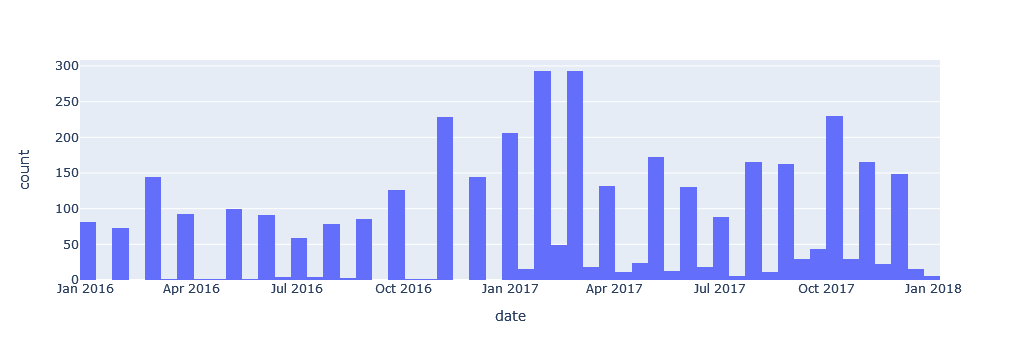

In [22]:
from datetime import datetime

begin_date = datetime(2016,1,1)
end_date = datetime(2018,1,1)
filtered = adl_data[(adl_data.date >= begin_date) & (adl_data.date < end_date)]
print(len(filtered))
px.histogram(filtered, x='date')

In [27]:
end_date = datetime(2016,1,1)
early = adl_data[adl_data.date < end_date]
len(early)

379

# Extract quotes from full ADL dataset

In [28]:
# From Ahmad
import unicodedata

def extract_quotes(text):
    text = unicodedata.normalize(u'NFKD', text)
    text = text.lower().translate(str.maketrans('', '', ",."))
    text = text.translate(str.maketrans('“”', '""'))
    qc = text.count('"')
    quotes = []
    end = -1
    for i in range(int(qc/2)):
        start = text.find('"', end+1)
        end = text.find('"', start+1)
        quotes.append(text[start:end+1])
    return quotes

adl_data['quote'] = adl_data.description.map(extract_quotes)
pd.set_option('display.max_colwidth', None)
adl_data.sample(20)[['type', 'ideology', 'group', 'quote', 'description']]

,type,ideology,group,quote,description
16629,Antisemitic Incident:Harassment,NaN,NaN,[],A Jewish middle school student was the subject of antisemitic posts on Snapchat by another middle school student.
16798,White Supremacist Propaganda,Right Wing (White Supremacist),New Jersey European Heritage Association,[],"New Jersey European Heritage Association, an alt right group, distributed propaganda."
22478,White Supremacist Propaganda,Right Wing (White Supremacist),Loyal White Knights,[],"Loyal White Knights, a Klan group, distributed recruitment fliers in Abington."
8446,Antisemitic Incident:Vandalism,NaN,NaN,"[""110""]","Two swastikas and two ""110""s were spray-painted at a mall."
23334,White Supremacist Propaganda,Right Wing (White Supremacist),Patriot Front,"[""keep america american"", ""welcome to occupied america"", ""america first""]","Patriot Front, an alt right group, posted flyers and stickers that read: ""Keep America American,"" ""Welcome to occupied America,"" and ""America First."""
2057,White Supremacist Propaganda,Right Wing (White Supremacist),Patriot Front,"[""patriot front"", ""for the nation against the state"", ""better dead than red"", ""reclaim america""]","Patriot Front, a white supremacist group distributed propaganda that read: ""Patriot Front,"" ""For the nation, against the state,"" ""Better dead than red"" and ""Reclaim America."""
24981,White Supremacist Event,Right Wing (White Supremacist),Traditionalist Worker Party,[],Several individuals associated with the Traditionalist Worker Party protested a Women's March.
14382,White Supremacist Propaganda,Right Wing (White Supremacist),Patriot Front,"[""life of our nation liberty of our people victory of the american spirit"", ""for the nation against the state"", ""united we stand"", ""reject poison"", ""america is not for sale"", ""better dead than red"", ""revolution is tradition""]","Patriot Front, an alt right group, distributed propaganda that read: ""Life of our nation liberty of our people victory of the American spirit,"" ""For the nation against the state,"" ""United we stand,"" ""Reject poison,"" ""America is not for sale,"" ""Better dead than red,"" and ""Revolution is tradition."""
26849,Antisemitic Incident:Vandalism,NaN,NaN,"[""kill all jews""]","Swastika and the words ""Kill all Jews"" found on bank property."
25976,Extremist Murder,Right Wing (White Supremacist),NaN,[],"James Alex Fields, 20, was indicted in June 2018 on federal hate crime charges for murdering anti-racist protester Heather Heyer. After participating in the white supremacist Unite the Right rally in Charlottesville, Fields drove his car into a crowd of protesters, killing Heyer and wounding 11 others."


In [30]:
# Save out
outpath = '../data/adl_processed_2022-10-07.json'
adl_data.to_json(outpath, orient='table', indent=4)

In [32]:
# Examine quotes between dates
begin_date = datetime(2016,1,1)
end_date = datetime(2018,1,1)
filtered_adl = adl_data[(adl_data.date >= begin_date) & (adl_data.date < end_date)]
filtered_adl.quote

25120                                                                         []
25121    ["your future with communism [skull image]", "money does not rule you"]
25122                                  ["keep traditions alive merry christmas"]
25123                                         ["no more refugees america first"]
25124                                  ["keep traditions alive merry christmas"]
                                          ...                                   
28935                                                                         []
28936                                                                         []
28937                                                                         []
28938                                ["dirty jew and a fucking israeli bastard"]
28939                                                                         []
Name: quote, Length: 3820, dtype: object

In [33]:
from collections import Counter

quotes = [quote for quotes in filtered_adl.quote for quote in quotes]
quotes_ctr = Counter(quotes)
quotes_ctr.most_common()

[('"our generation our future our last chance"', 39),
 ('"action leadership identity"', 38),
 ('"our future belongs to us"', 35),
 ('"let\'s become great again"', 34),
 ('"protect your heritage"', 31),
 ('"serve your people"', 27),
 ('"our destiny is ours"', 25),
 ('"heil hitler"', 23),
 ('"jokes"', 13),
 ('"resurrection through insurrection"', 12),
 ('"white power"', 12),
 ('"dirty jew"', 12),
 ('"your future with communism [skull image]"', 11),
 ('"not stolen conquered"', 10),
 ('"jew"', 10),
 ('"kike"', 10),
 ('"fucking jew"', 10),
 ('"fuck jews"', 9),
 ('"imagine a muslim-free america"', 8),
 ('"blood and soil"', 7),
 ('"march against sharia"', 7),
 ('"money does not rule you"', 6),
 ('"not here not ever [eagle with hammer and sickle]"', 6),
 ('"will your speech be hate speech?"', 6),
 ('"nazi"', 6),
 ('"fuck the jews"', 6),
 ('"we have a right to exist"', 6),
 ('"so radical your professors will blush"', 5),
 ('" and "', 5),
 ('"fuck you"', 5),
 ('"love your own race stop homosexua

In [34]:
len(quotes)

1126